# Trying out UK Government corona virus data API

Documentation here: https://coronavirus.data.gov.uk/details/developers-guide#format-example

In [2]:
import datetime
import time
import requests
import matplotlib.pyplot as plt

### Adapting example from the API documentation page. This gets "new cases" data.

In [3]:
endpoint = (
    'https://api.coronavirus.data.gov.uk/v1/data?'
    'filters=areaType=nation;areaName=england&'
    'structure={"date":"date","newCases":"newCasesByPublishDate"}'
    )

response = requests.get(endpoint)

print(time.strftime("%d/%m/%Y %H:%M:%S"), "- Status code:", response.status_code)

try:
    json_data = response.json()
except Exception as err:
    print(err)
    json_data = []

05/04/2021 10:29:01 - Status code: 200


## Plot graph using above data
- New cases vs date are in `json_data["data"]`    
- Extract x/y values and plot as graph

#### Reducing x-axis number of ticks
Getting dates looking nice on x-axis was slightly troublesome. Originally just left the dates as strings, which works but also means matplotlib automatically includes a tick for each one but as there were 480 points the text was all squashed together.   

Looked for simple solution to reducing number of xticks was tricky. Tried just reducing by using `plt.xticks([x for i, x in enumerate(xs) if i%20==0])` but this doesn't work when x values are strings (although likely works with numerical data).    

Solution was to convert the string dates to datetime objects. Matplotlib then automatically reduced the number of ticks. (Possibly could also refine by using `import matplotlib.dates as mdates`)

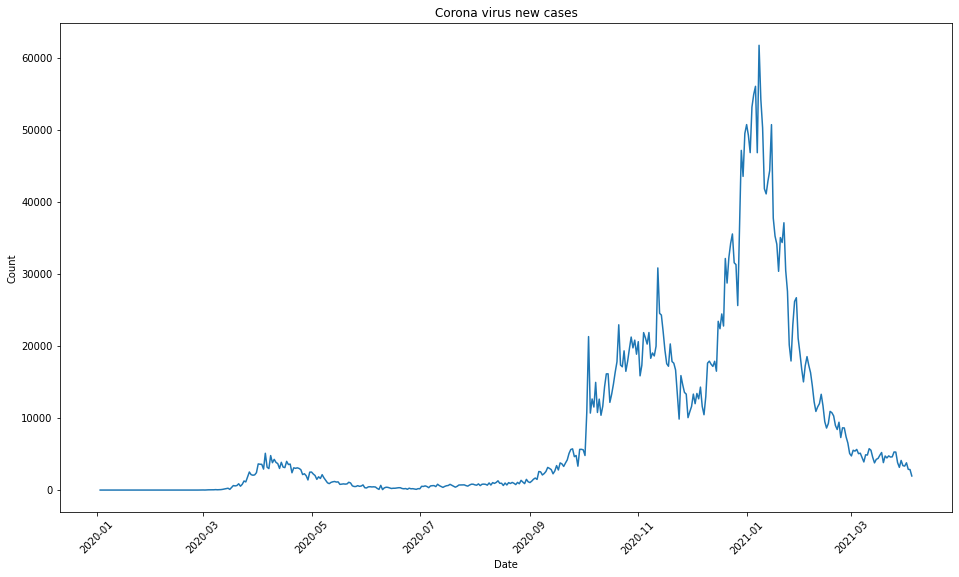

In [8]:
%matplotlib inline

date_format = '%Y-%m-%d'

values = json_data.get("data", {})
xs = [datetime.datetime.strptime(v.get("date"), date_format).date() for v in values]
ys = [v.get("newCases", 0) for v in values]

plt.figure(figsize=(16, 9))
plt.title("Corona virus new cases")
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Count')

graph = plt.plot(xs, ys)